In [22]:
import pandas as pd
import numpy as np

df = pd.read_excel("D:/internship/internship/flight_price_pred/Flight_Ticket (1).xlsx")


In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
df.shape

(10683, 11)

In [25]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [26]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [27]:

print("Missing values before cleaning:")
print(df.isnull().sum())
df.dropna(inplace=True)

print("\nNumber of duplicate rows before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

df.drop(columns=['Route'], inplace=True)

print("\nDataset shape after cleaning:", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Number of duplicate rows before removal: 220

Dataset shape after cleaning: (10462, 10)

Missing values after cleaning:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [28]:
print("\nFinal columns:")
print(df.columns)


Final columns:
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')


In [29]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Price"] >= Q1 - 1.5*IQR) & (df["Price"] <= Q3 + 1.5*IQR)]

In [30]:
df.drop(["Additional_Info"], axis=1, inplace=True)

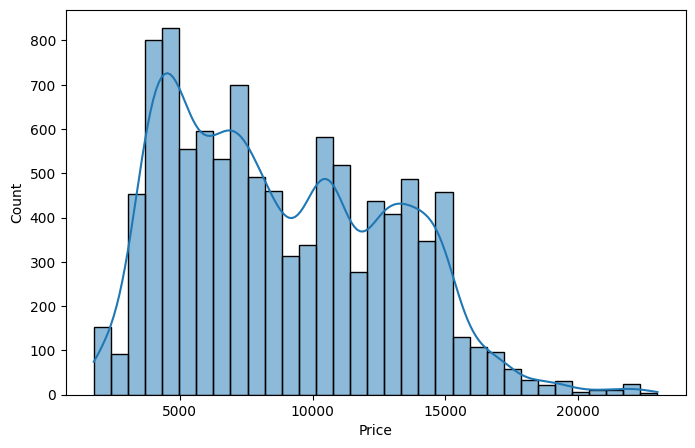

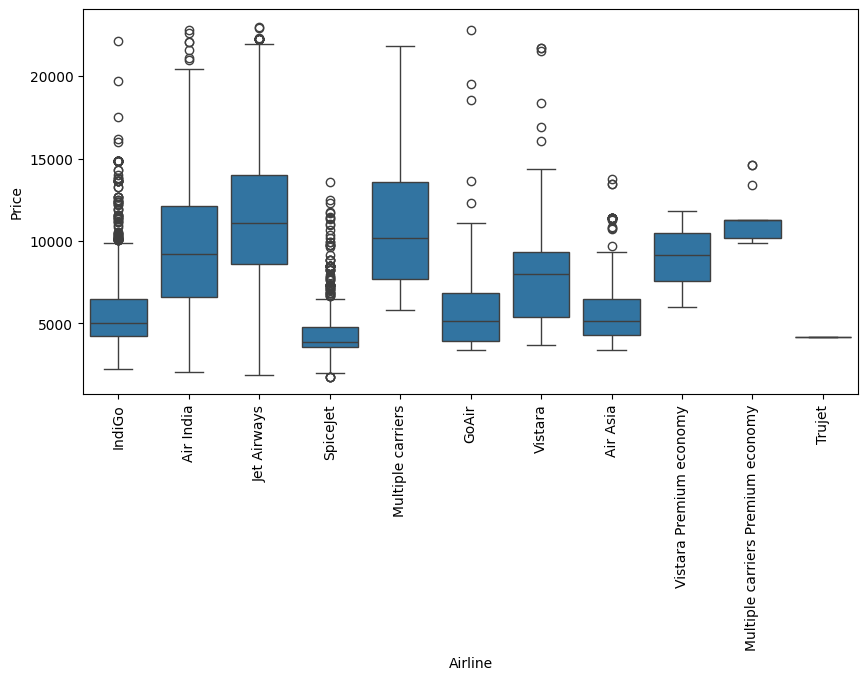

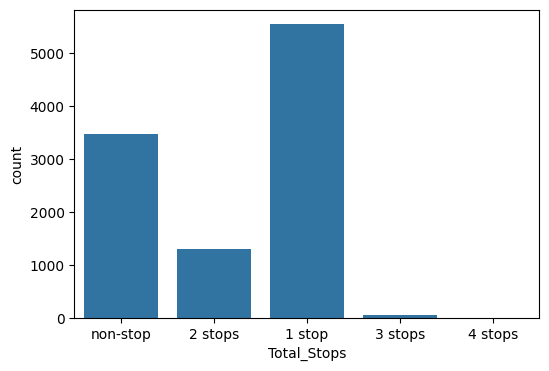

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["Price"], kde=True)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x="Airline", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Total_Stops", data=df)
plt.show()

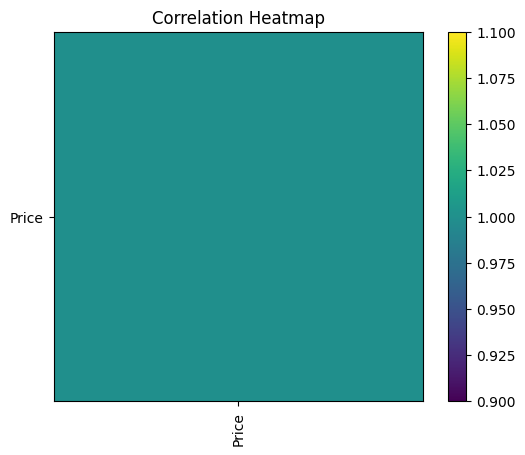

In [32]:
# Correlation heatmap
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df.drop("Date_of_Journey", axis=1, inplace=True)

In [34]:
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

df.drop(["Dep_Time", "Arrival_Time"], axis=1, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2384\1988930885.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2384\1988930885.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2384\1988930885.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2384\1988930885.py:

In [35]:
df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(" ", "+").str.replace("m", "").apply(eval)

In [36]:
df["Total_Stops"] = df["Total_Stops"].replace({
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2384\182790729.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total_Stops"] = df["Total_Stops"].replace({


In [37]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name)
    print("R2:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


Random Forest
R2: 0.8035876473655656
MAE: 1135.3607823009386
RMSE: 1785.5726951799404


In [40]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [41]:
rf.predict(X_test.iloc[:1])

array([10263.3818412])

In [42]:
import pickle

pickle.dump(rf, open("model.pkl", "wb"))
pickle.dump(rf, open("encoders.pkl", "wb"))